In [16]:
%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw
from fragmenstein import Victor, Igor
import sys
sys.path.append('/Users/kate_fieseler/PycharmProjects/chemUtils')
import chemUtils
from chemUtils import protein

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Looking at an elaborated compound that was proposed from base compound as proposed by Steph's Fragment Network for D68EV3CPROA.

Idea 1: Place elaborated compound already in the binding site. Problem, cannot get those structures easily without user providing. Also, basing your placement on the already non experimentally placed compound is not ideal. Will try because I have that .sdf.

Idea 2: Place elaborated compound based on fragment hits used. Relies on fragment inspiration being provided.

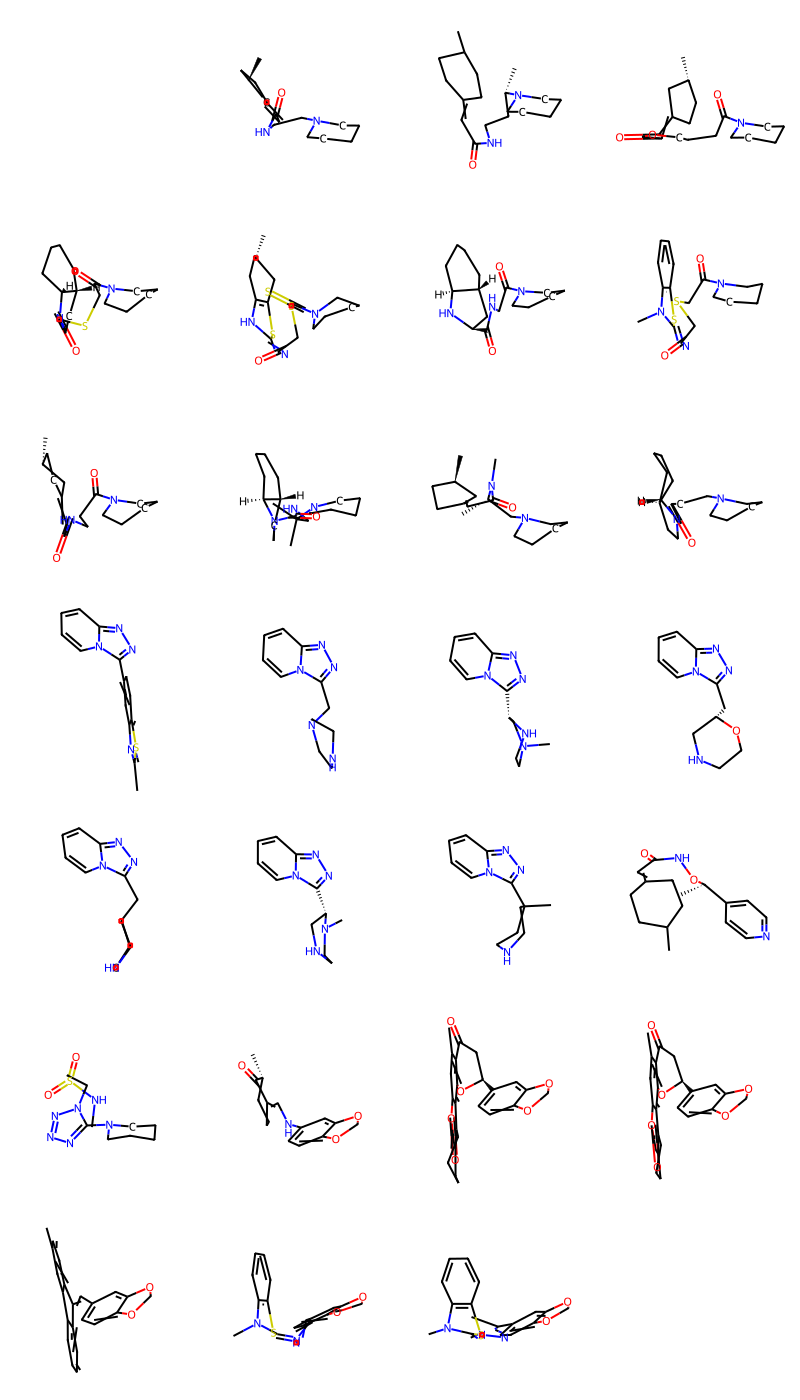

In [17]:
# Convert sdf of first base compound to mol
follow_ups = Chem.SDMolSupplier('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/followups_set1/compound-set_fragnetv1.sdf')
# for mol in follow_ups:
#     #img = Draw.MolsToImage(mol)
Draw.MolsToGridImage(follow_ups, molsPerRow=4)

In [18]:
base_mol = follow_ups[1]
base_mol
writer = Chem.SDWriter('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug3/10_cherrypicked/base.mol')
writer.write(base_mol)

In [13]:
def run_fragmenstein(hits,  # list of rdkit mol objects of hits to help place
                     apo_file,  # path to pdb file for protein
                     work_path,
                     smiles,
                     name):
    Igor.init_pyrosetta()
    v = Victor(hits=hits, pdb_filename=apo_file)
    v.work_path = work_path
    v.place(smiles, long_name=name)

In [14]:
# TEST IDEA 1
smiles = 'CC1CC(C)CN(CCN(C)C(=O)C=C2CC3CNC2C3)C1'
apo_file = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/d68_fragment_apofiles/D68EV3CPROA-x0771_0A_apo-desolv.pdb'

In [15]:
# TEST IDEA 1
run_fragmenstein([base_mol],
                 apo_file,
                 '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug3/',
                 smiles,
                 'elaborated_compound1')

elaborated-compound1 - Folder /Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug3/elaborated-compound1 exists.


PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


Test Idea 1 worked well. Now to try Idea 2.

In [59]:
# EXTRACTING LIGAND TRY
def extract_ligand(pdb_file_path):
    # Read the PDB file
    complex_mol = Chem.MolFromPDBFile(pdb_file_path, sanitize=False)

    # Identify the small molecule
    # This could be done in various ways depending on the structure of the PDB file
    # Here's an example that assumes the small molecule's atoms are all in a specific residue
    small_molecule_atoms = [atom for atom in complex_mol.GetAtoms() if atom.GetPDBResidueInfo().GetResidueName() == 'LIG']

    # Extract the small molecule
    edit_mol = Chem.EditableMol(Chem.Mol())
    atom_map = {}
    for atom in small_molecule_atoms:
        idx = edit_mol.AddAtom(atom)
        atom_map[atom.GetIdx()] = idx

    for atom in small_molecule_atoms:
        for neighbor in atom.GetNeighbors():
            if neighbor in small_molecule_atoms:
                edit_mol.AddBond(atom_map[atom.GetIdx()], atom_map[neighbor.GetIdx()], neighbor.GetBondType())

    small_molecule_mol = edit_mol.GetMol()
    return small_molecule_mol

In [3]:
# EXTRACTING LIGAND TRY WITH PAT WALTERS CODE
%autoreload 2
from chemUtils.protein import split_complex_v2


In [5]:
hitA_pdb_file_path = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x0771_0A/D68EV3CPROA-x0771_0A_bound_pocket.pdb'
hitB_pdb_file_path = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x1083_0A/D68EV3CPROA-x1083_0A_bound.pdb'
extract_ligand(hitA_pdb_file_path)
split_complex_v2.main(hitB_pdb_file_path)

@> 3197 atoms and 1 coordinate set(s) were parsed in 0.01s.


wrote /Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x1083_0A/D68EV3CPROA-x1083_0A_bound.pdb_protein.pdb


KeyError: 'ligandInfo'

In [13]:
hitA = Chem.MolFromMol2File('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x0771_0A/D68EV3CPROA-x0771_0A_bound_pocket_no_protein.mol2')
hitB = Chem.MolFromMol2File('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x1083_0A/D68EV3CPROA-x1083_0A_bound_no_protein.mol2')
hitA

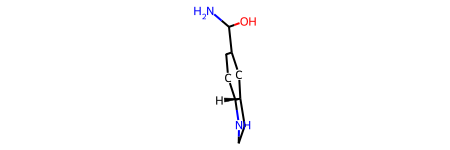

In [7]:
# JUST LOAD STRAIGHT FRAGMENTS FROM SDF
fragments = Chem.SDMolSupplier('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/D68EV3CPROA_combined.sdf')
Draw.MolsToGridImage(fragments, molsPerRow=4)
# x0771_0A is the 3rd
# x1083_0A is the 8th
hitA = fragments[2]
hitB = fragments[7]
hitA

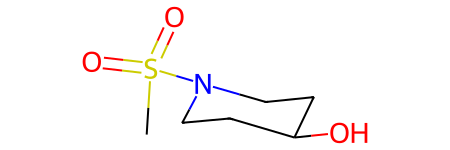

In [8]:
hitB

In [10]:
smiles = 'CC1CC(C)CN(CCN(C)C(=O)C=C2CC3CNC2C3)C1'
apo_file = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/d68_fragment_apofiles/D68EV3CPROA-x0771_0A_apo-desolv.pdb'
run_fragmenstein([hitA, hitB],
                 apo_file,
                 '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug3/',
                 smiles,
                 'elaborated_compound_wfragments')

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


Placement worked!!!